In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="paper", font_scale=1.3)

In [2]:
res = pd.read_csv("results.csv", sep=";", header=None)

In [4]:
res.T

,0,1,2,3,4,5,6
0,Run1,simple,gpt,2,3,2,3
1,Run1,simple,llama,4,2,3,3
2,Run1,simple,tiny,1,1,1,1
3,Run1,complex,tiny,1,1,3,4
4,Run1,complex,gpt,5,4,3,2
...,...,...,...,...,...,...,...
121,Run3,simple,tiny,1,1,1,1
122,Run3,simple,gpt,1,1,2,3
123,Run3,complex,tiny,4,3,3,1
124,Run3,complex,gpt,3,3,3,2


In [5]:
res_t = res.T
res_t.columns = ["Run", "Prompt", "Model", "Score1", "Score2", "Score3", "Score4"]
res_t["Score1"] = res_t["Score1"].astype(float)
res_t["Score2"] = res_t["Score2"].astype(float)
res_t["Score3"] = res_t["Score3"].astype(float)
res_t["Score4"] = res_t["Score4"].astype(float)

res_t["Score"] = res_t[["Score1", "Score2", "Score3", "Score4"]].mean(axis=1)

## RQ 1

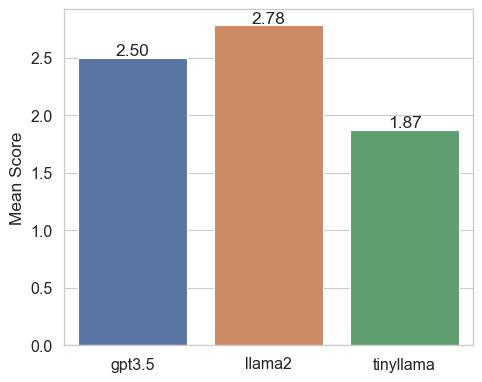

In [9]:
rq1 = res_t.pivot_table(
    index="Run", columns=["Model"], values=["Score"], aggfunc="mean"
)
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.barplot(data=rq1.agg("mean").reset_index(), x="Model", y=0, hue='Model')
plt.ylabel("Mean Score")
plt.xlabel("")
plt.xticks([0, 1, 2], ["gpt3.5", "llama2", "tinyllama"])
for p in ax.patches:
    if not p.get_height() == 0.0:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )
plt.tight_layout()
plt.savefig("figures/rq1.pdf")

## RQ 2

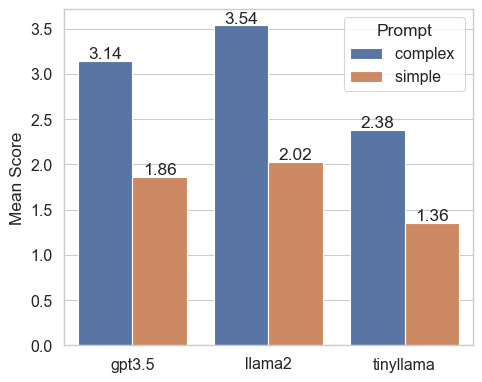

In [8]:
rq2 = res_t.pivot_table(
    index="Run", columns=["Model", "Prompt"], values=["Score"], aggfunc="mean"
)
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.barplot(data=rq2.agg("mean").reset_index(), x="Model", y=0, hue="Prompt")
# show values on top of bars
for p in ax.patches:
    if not p.get_height()==0.0:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )
sns.move_legend(ax, "upper right", frameon=True)
plt.ylabel("Mean Score")
plt.xlabel("")
plt.xticks([0, 1, 2], ["gpt3.5", "llama2", "tinyllama"])
plt.tight_layout()
plt.savefig("figures/rq2.pdf")

## RQ 3

In [10]:
rq3 = res_t.pivot_table(columns=["Model", "Prompt", "Run"], values=["Score"], aggfunc="mean")

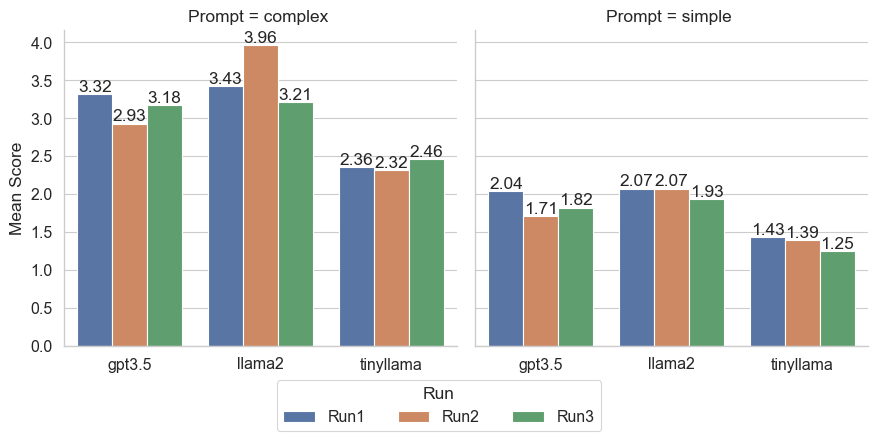

In [12]:
grid = sns.catplot(
    data=rq3.aggregate("mean").reset_index(),
    x="Model",
    y=0,
    hue="Run",
    col="Prompt",
    kind="bar",
    height=4,
)
grid.set_axis_labels("", "Mean Score")

# show values on top of bars
for ax in grid.axes.flat:
    for p in ax.patches:
        if not p.get_height()==0.0:
            ax.annotate(
                f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center",
                va="center",
                xytext=(0, 5),
                textcoords="offset points",
            )
sns.move_legend(grid, "lower center", ncol=3, frameon=True, bbox_to_anchor=(0.5, -0.12))
grid.set_xticklabels(["gpt3.5", "llama2", "tinyllama"])
plt.tight_layout()
plt.savefig("figures/rq3.pdf", bbox_inches="tight")